### 1. Problem statement
 - We are given Google stock price from 01/2012 to 12/2017.
 - The task is to predict the trend of the stock price for 01-06 2018.

### 2. Import library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

### 3. Data processing

#### 3.0 import the data

In [4]:
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
#keras only takes numpy array
training_set = dataset_train.iloc[:, 1: 2].values

In [6]:
training_set.shape

(1509, 1)

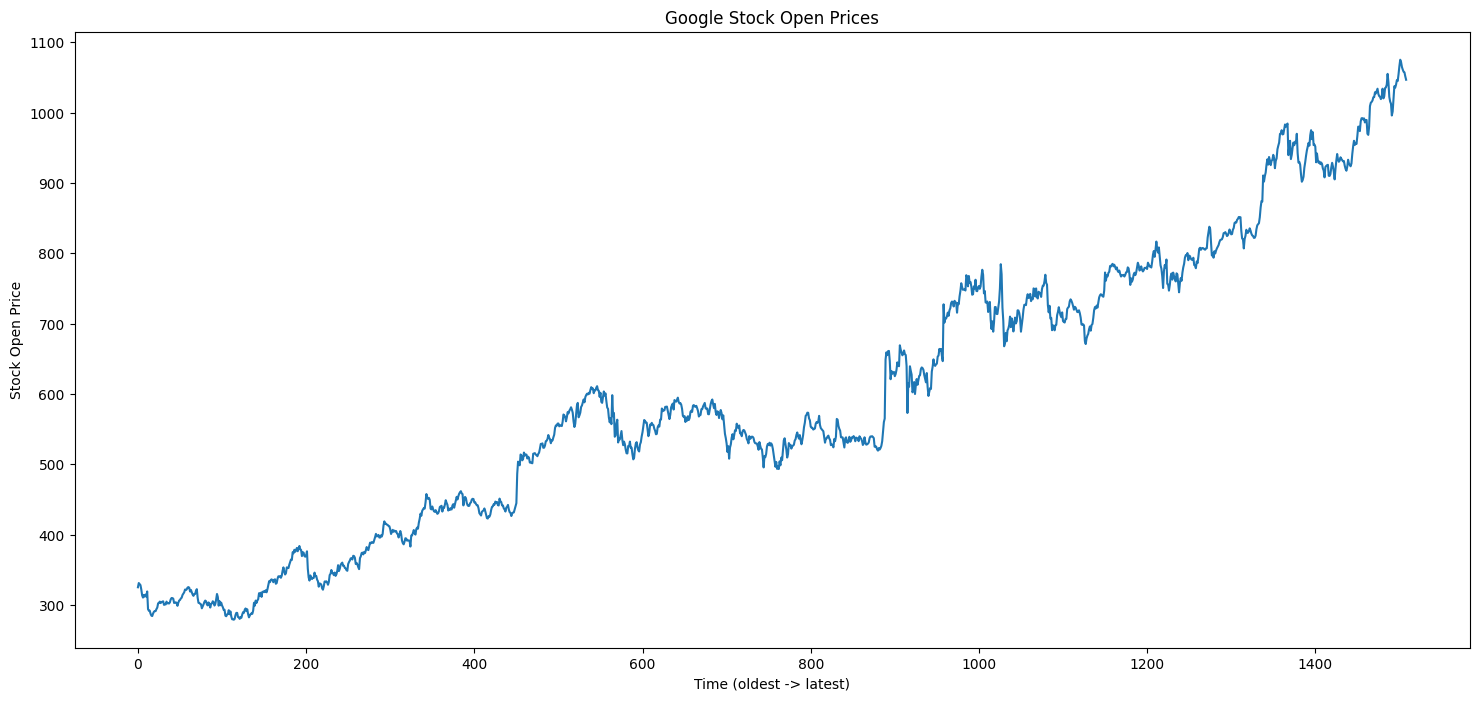

In [7]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

#### 3.1 Feature scaling

In [8]:
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

#### 3.2 Data structure creation

- taking the reference of past 60 days of data to predict the future stock price.  
- It is observed that taking 60 days of past data gives us best results.  
- In this data set 60 days of data means 3 months of data.  
- Every month as 20 days of Stock price.   
- X train will have data of 60 days prior to our date and y train will have data of one day after our date

In [9]:
## 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
X_train.shape

(1449, 60)

In [11]:
y_train.shape

(1449,)

#### 3.3 Data reshaping

In [12]:
X_train = np.reshape(X_train, newshape =
                     (X_train.shape[0], X_train.shape[1], 1))

1. Number of stock prices - 1449  
2. Number of time steps - 60  
3. Number of Indicator - 1  

In [13]:
X_train.shape

(1449, 60, 1)

### 4. Create & Fit Model

#### 4.1 Create model

In [14]:
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

##add output layer
regressor.add(Dense(units = 1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [30]:
import torch
import torch.nn as nn

# ----------------------------
# Parameters
# ----------------------------
input_size = 5     # Size of each input vector
hidden_size = 25   # Size of hidden state
output_size = 2   # Size of the output vector
seq_length = 7     # Length of input sequence
batch_size = 2    # Number of sequences in a batch

# ----------------------------
# Sample Input: [batch_size, seq_length, input_size]
# ----------------------------
x = torch.randn(batch_size, seq_length, input_size)  # Random input sequence

# ----------------------------
# Define a Simple RNN Model
# ----------------------------
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)  # Map hidden state to output

    def forward(self, x):
        # x: [batch_size, seq_length, input_size]
        out, h_n = self.rnn(x)      # out: [batch_size, seq_length, hidden_size]
        last_hidden = out[:, -1, :] # Get hidden state at last time step
        out = self.fc(last_hidden)  # out: [batch_size, output_size]
        return out

# ----------------------------
# Instantiate and Run the Model
# ----------------------------
model = SimpleRNN(input_size, hidden_size, output_size)
output = model(x)

print("Input shape:", x.shape)        # [1, 7, 5]
print("Output shape:", output.shape)  # [1, 2]


Input shape: torch.Size([2, 7, 5])
Output shape: torch.Size([2, 2])


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0578
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0083
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0036
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0033
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0020
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0018
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0023
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0022
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0029
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0017
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.5859e-04
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0016
Epoch 13/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0010   
Epoch 14/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0016
Epoch 15/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9

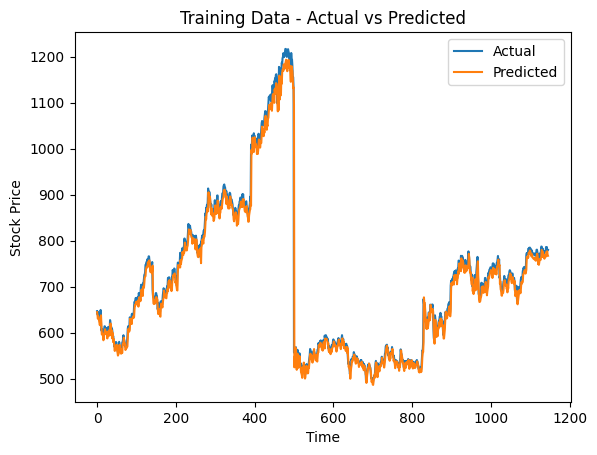

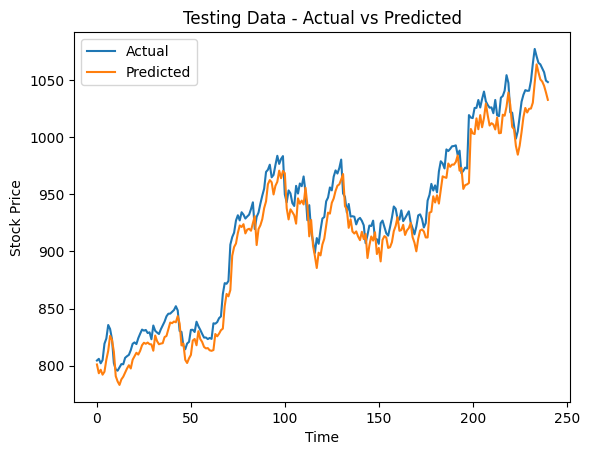

In [32]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Download historical stock data (e.g., Apple)
data = pd.read_csv('/content/Google_Stock_Price_Train.csv')

# Clean 'Close' column: remove commas and convert to numeric
data["Close"] = data["Close"].astype(str).str.replace(',', '', regex=False)
data["Close"] = pd.to_numeric(data["Close"], errors='coerce')

# Drop any rows with NaN values that resulted from conversion errors (if any)
data.dropna(subset=["Close"], inplace=True)

# Normalize data
scaler = MinMaxScaler()
data["Close"] = scaler.fit_transform(np.array(data["Close"]).reshape(-1, 1))

# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Create dataset with lookback period (e.g., 60 days)
def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset['Close'][i:(i + look_back)].values  # Access 'Close' column and convert to NumPy array
        X.append(a)
        # Access 'Close' column by name using .iloc for integer-based indexing
        Y.append(dataset['Close'].iloc[i + look_back])
    return np.array(X), np.array(Y)

look_back = 60
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Create RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train model
model.fit(X_train, Y_train, epochs=100, batch_size=64, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))  # Reshape Y_train before inverse transform
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))  # Reshape Y_test before inverse transform

# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Calculate root mean squared error (RMSE)
train_rmse = math.sqrt(mean_squared_error(Y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(Y_test, test_predict))
print('Train RMSE: %.3f' % (train_rmse))
print('Test RMSE: %.3f' % (test_rmse))

# Calculate mean absolute error (MAE)
train_mae = mean_absolute_error(Y_train, train_predict)
test_mae = mean_absolute_error(Y_test, test_predict)
print('Train MAE: %.3f' % (train_mae))
print('Test MAE: %.3f' % (test_mae))

# Plot the results
import matplotlib.pyplot as plt

# Plot the training data and predictions
plt.plot(Y_train, label='Actual')
plt.plot(train_predict, label='Predicted')
plt.title('Training Data - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot the testing data and predictions
plt.plot(Y_test, label='Actual')
plt.plot(test_predict, label='Predicted')
plt.title('Testing Data - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

#### 4.2 Model fit

In [16]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0508
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0035
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0036
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0034
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0033
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0031
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0030
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0027
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0028
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0025
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0031
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0026
Epoch 13/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0035
Epoch 14/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0022
Epoch 15/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - lo

#### 4.3 Model evaluation

#### 4.3.1 Read and convert

In [17]:
dataset_test = pd.read_csv('/content/Google_Stock_Price_Train.csv')

In [18]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [19]:
#keras only takes numpy array
real_stock_price = dataset_test.iloc[:, 1: 2].values
real_stock_price.shape

(1509, 1)

#### 4.3.2 Concat and convert

In [20]:
#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']),
                          axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

#### 4.3.3 Reshape and scale

In [21]:
#reshape data to only have 1 col
inputs = inputs.reshape(-1, 1)

#scale input
inputs = sc.transform(inputs)

In [22]:
len(inputs)

1569

#### 4.3.4 Create test data structure

In [23]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [24]:
X_test.shape

(1509, 60, 1)

#### 4.3.5 Model prediction

In [25]:
predicted_stock_price = regressor.predict(X_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [26]:
#inverse the scaled value
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#### 4.3.6 Result visualization

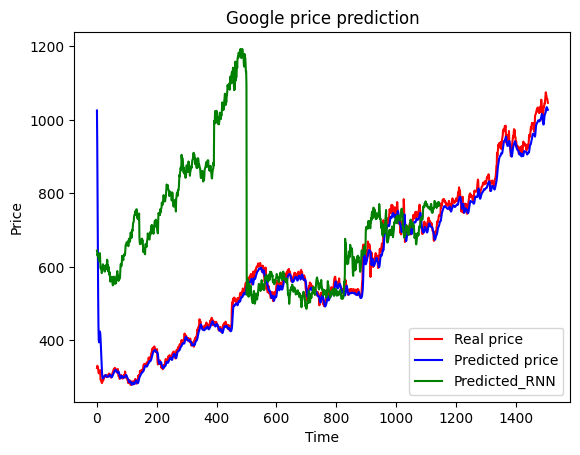

In [37]:
##visualize the prediction and real price
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')
plt.plot(train_predict, color ='green', label='Predicted_RNN')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Task: Compare results with RNN (use previous RNN code on this data, plot LSTM/RNN results together), then vary LSTM parameters to make results more accurate

In [28]:
# This code will be for the simple RNN

Input shape: torch.Size([2, 7, 5])
Output shape: torch.Size([2, 2])


In [29]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Download historical stock data (e.g., Apple)
data = yf.download("AAPL", start="2020-01-01", end="2023-12-08")
data = data[["Close"]]  # Use only closing price

# Normalize data
scaler = MinMaxScaler()
data["Close"] = scaler.fit_transform(np.array(data["Close"]).reshape(-1, 1))

# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Create dataset with lookback period (e.g., 60 days)
def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset['Close'][i:(i + look_back)].values  # Access 'Close' column and convert to NumPy array
        X.append(a)
        # Access 'Close' column by name using .iloc for integer-based indexing
        Y.append(dataset['Close'].iloc[i + look_back])
    return np.array(X), np.array(Y)

look_back = 60
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Create RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train model
model.fit(X_train, Y_train, epochs=100, batch_size=64, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))  # Reshape Y_train before inverse transform
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))  # Reshape Y_test before inverse transform

# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Calculate root mean squared error (RMSE)
train_rmse = math.sqrt(mean_squared_error(Y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(Y_test, test_predict))
print('Train RMSE: %.3f' % (train_rmse))
print('Test RMSE: %.3f' % (test_rmse))

# Calculate mean absolute error (MAE)
train_mae = mean_absolute_error(Y_train, train_predict)
test_mae = mean_absolute_error(Y_test, test_predict)
print('Train MAE: %.3f' % (train_mae))
print('Test MAE: %.3f' % (test_mae))

# Plot the results
import matplotlib.pyplot as plt

# Plot the training data and predictions
plt.plot(Y_train, label='Actual')
plt.plot(train_predict, label='Predicted')
plt.title('Training Data - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot the testing data and predictions
plt.plot(Y_test, label='Actual')
plt.plot(test_predict, label='Predicted')
plt.title('Testing Data - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

/tmp/ipython-input-1265321330.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2020-01-01", end="2023-12-08")
[*********************100%***********************]  1 of 1 completed


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - loss: 0.2906
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0108
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0055
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0030
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0023
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0021
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0020
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0017
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0016
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0017
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0015
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0015
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0015
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0015
Epoch 15/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0017


KeyboardInterrupt: 